In [14]:
## Introduction
# RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

In [15]:
## Importing Packages

#To begin, we must import all the packages needed for analysis of titanic dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import parallel_coordinates
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [16]:
## Importing Data
#The titanic Data is imported

data = pd.read_csv('E:\\Udacity\\Machine Learning Nanodegree\\P2- titanic survival\\titanic_data.csv')
data = data.dropna(subset = ['Embarked'])
data.head()

# Survived: Outcome of survival (0 = No; 1 = Yes)
# Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
# Name: Name of passenger
# Sex: Sex of the passenger
# Age: Age of the passenger (Some entries contain NaN)
# SibSp: Number of siblings and spouses of the passenger aboard
# Parch: Number of parents and children of the passenger aboard
# Ticket: Ticket number of the passenger
# Fare: Fare paid by the passenger
# Cabin Cabin number of the passenger (Some entries contain NaN)
# Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


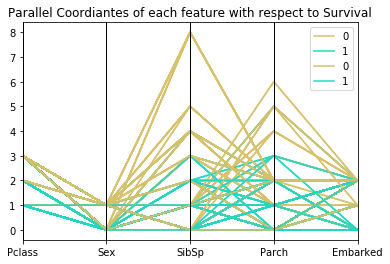

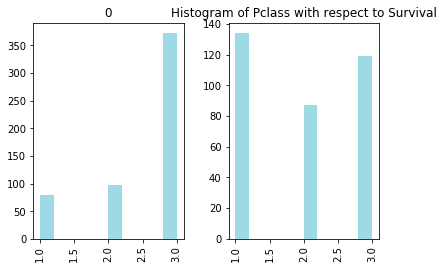

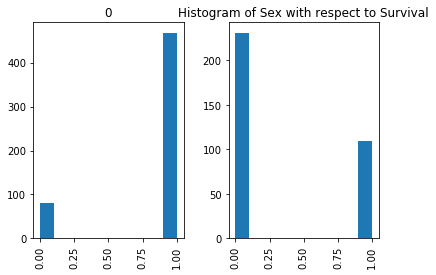

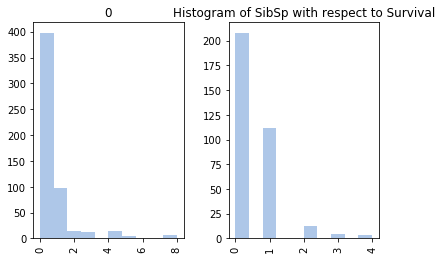

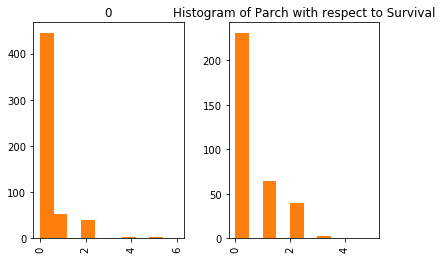

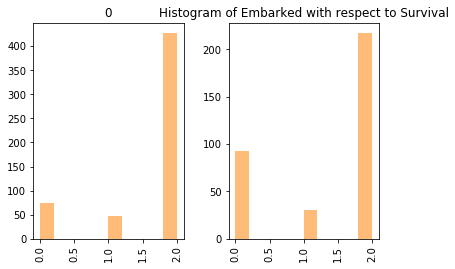

In [17]:
## Plot and see the features influence on survival

# Various plots like parallel coordiantes and histograms are shown with features across the Survival Rate. It is shown that female have high chance of survival rather than men. Also, people who travlled in Pclass 3 has high mortality rate. People who have embarktion at 'Cherbourg' or 'Southampton' have higher chances of survival. People who have less than 3 siblings and spouses have higher chances of survival rate.

plt_X = data.iloc[:,[1,2,4,6,7,11]].values
label_plt = LabelEncoder()
plt_X[:,2] = label_plt.fit_transform(plt_X[:,2])
plt_X[:,5] = label_plt.fit_transform(plt_X[:,5])

plt_X = pd.DataFrame(plt_X)
plt_X.columns = data.columns[[1,2,4,6,7,11]]
parallel_coordinates(plt_X,'Survived')
plt.title("Parallel Coordiantes of each feature with respect to Survival")

tableau5 = [(31,119,180),(174, 199, 232), (255, 127, 14), (255, 187, 120),(158, 218, 229)]
for clr in range(len(tableau5)):
    r,g,b = tableau5[clr]
    tableau5[clr] = (r/255.,g/255.,b/255.)
rank = -1  
for names in plt_X.columns[1:]: 
    plt_X[names].hist(by = plt_X['Survived'],color=tableau5[rank])
    plt.title('Histogram of '+names+' with respect to Survival')
    plt.show()
    rank = rank + 1

In [18]:
## Seperating the Survival class from the predictors

# The label column 'Survived' is separated from the predictors for further analysis.
X = data.iloc[:,[2,4,5,6,7,11]].values
y = data.iloc[:,1].values

## Applying Imputation for missing values of Age and Label Encoder for categrocial variables of string type

# The missing values in Age is imputed with a median value.

imputer  = Imputer(missing_values = 'NaN',strategy = 'median',axis = 1)
X[:,2]  = imputer.fit_transform(X[:,2])             

# The Label Encoder encodes the categorical strings in gender and embarked columns to values.

label = LabelEncoder()
X[:,1] = label.fit_transform(X[:,1])
X[:,5] = label.fit_transform(X[:,5])

C:\Users\Raghavendran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [19]:
## Split the table as training and Testing data

# The StratifiedKFold is used to split the data into training and test sets. The StartifiedKFold splits in such as way that there are equal propotions of class labels in each set.

sfold = StratifiedKFold(n_splits = 4)
for i,j in sfold.split(X,y):
    X_train,X_test = X[i],X[j]
    y_train,y_test = y[i],y[j]

In [20]:
## Applying Navie Bayes algorithm to fit the Training Set

# The Naive Bayes algorithm is applied in the training set. MultinomailNB is used to fit the training sets. Naive Bayes obeys Bayes Theorem assuming that the he effect of the value of a predictor (Feature) on a given class (Survived) is independent of the values of other predictors : P(Survived|Feature) = P(Feature|Survived)* P(Survived)/P(Feature)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)

## Prediciton of surivial on Test Data

# The algorithm is ready to predict the test sets based on the learning from training set

pred = naive_bayes.predict(X_test)
100*accuracy_score(y_test,pred)


68.468468468468473

In [21]:
## Question 1 - Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?

pred_0 = pd.Series(np.zeros(len(y),dtype = int))

100*accuracy_score(y,pred_0)

61.754780652418454

In [22]:
## Question 2 - How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

data_fm = data

data_fm['Female_Survived'] = data_fm.apply(lambda p: 1 if p['Sex'] == 'female' else 0,axis= 1)

pred_1 =  data_fm['Female_Survived']     
100*accuracy_score(y,pred_1)

78.627671541057367

In [23]:
## Question 3 - How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?

data_sur = data

data_sur['Survived1'] = data_sur.apply(lambda q: 1 if q['Sex'] == 'female' or (q['Sex'] == 'male' and q['Age'] < 10) else 0,axis = 1)    

pred_2 = data_sur['Survived1']
100*accuracy_score(y,pred_2)

79.302587176602927

In [24]:
##  Question4 - Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?
data_sur = data
data_sur['Survived2'] = data_sur.apply(lambda q: 1 if q['Sex'] == 'female' or q['Age'] < 16 and q['Pclass'] < 3  and q['SibSp'] < 3 and q['Parch'] < 3 and (q['Embarked'] == 'C' or q['Embarked'] == 'S') else 0,axis = 1)    
pred_3 = data_sur['Survived2']
100*accuracy_score(y,pred_3)
print("The number of women or people of less than 16 years old who has travelled in the first and second class; who has siblings and spouses of less than 3 and parents of less than 3 and has embarked in Station C or S had more chances of surviving the accident")

The number of women or people of less than 16 years old who has travelled in the first and second class; who has siblings and spouses of less than 3 and parents of less than 3 and has embarked in Station C or S had more chances of surviving the accident


In [25]:
## Question 5 - Valid Scenario where Supervised Learning can be applied

print("The Supervised Learning can be applied to detect whether the song is successful or not of a song based on the features from BillBoard charts.")
print("The Features are : Danceability, Valence, Energy, tempo and Peak")

The Supervised Learning can be applied to detect whether the song is successful or not of a song based on the features from BillBoard charts.
The Features are : Danceability, Valence, Energy, tempo and Peak
